### 데이터 준비

In [1]:
import pandas as pd
data = pd.read_csv("../../데이터/재무제표_분석용데이터.csv", encoding="euc-kr")
data.drop(['ROA', 'ROE', '배당금', 'PER'], axis = 1, inplace = True)
data['수익률'] = (data['미래_주가'] - data['현재_주가']) / data['현재_주가'] * 100
data.dropna(inplace = True)

### 환경 설정

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False

### 수익률과의 상관관계 확인

#### 부채비율

(-100.0, 100.0)

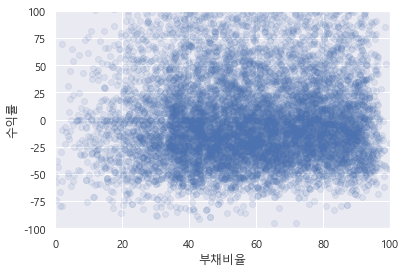

In [4]:
plt.scatter(data['부채비율'], data['수익률'], alpha = 0.1)
plt.xlabel("부채비율")
plt.ylabel("수익률")
plt.xlim(0, 100)
plt.ylim(-100, 100)

In [5]:
display(data.corr().round(4))

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,현재_주가,미래_주가,수익률
연도,1.0000,0.0074,-0.0085,0.0029,0.0057,-0.0364,-0.0136,0.1763
부채비율,0.0074,1.0000,0.0060,0.0041,-0.0026,0.0459,0.0480,-0.0127
매출액증가율,-0.0085,0.0060,1.0000,0.2653,0.3281,0.0041,0.0048,0.0096
영업이익증가율,0.0029,0.0041,0.2653,1.0000,0.0853,-0.0011,-0.0011,-0.0009
당기순이익증가율,0.0057,-0.0026,0.3281,0.0853,1.0000,0.0030,0.0050,0.0092
현재_주가,-0.0364,0.0459,0.0041,-0.0011,0.0030,1.0000,0.9184,-0.0632
미래_주가,-0.0136,0.0480,0.0048,-0.0011,0.0050,0.9184,1.0000,0.0540
수익률,0.1763,-0.0127,0.0096,-0.0009,0.0092,-0.0632,0.0540,1.0000


#### 매출액 증가율

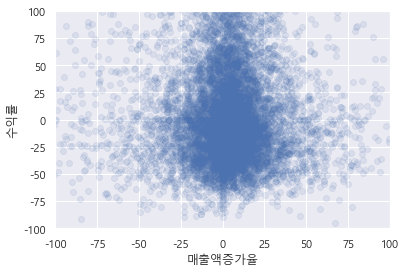

0.0095


In [6]:
temp = data.loc[data['매출액_상태'] == "흑자지속", ['매출액증가율', '수익률']]
plt.scatter(temp['매출액증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("매출액증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['매출액증가율', '수익률'].round(4))

#### 영업이익 증가율

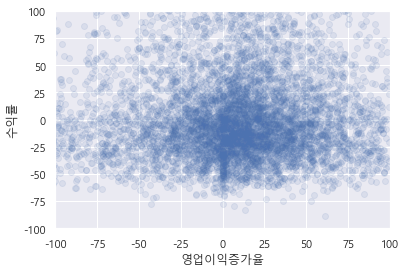

0.0031


In [7]:
temp = data.loc[data['영업이익_상태'] == "흑자지속", ['영업이익증가율', '수익률']]
plt.scatter(temp['영업이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("영업이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['영업이익증가율', '수익률'].round(4))

#### 당기순이익 증가율

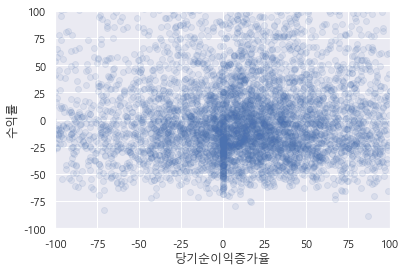

-0.0014


In [8]:
temp = data.loc[data['당기순이익_상태'] == "흑자지속", ['당기순이익증가율', '수익률']]
plt.scatter(temp['당기순이익증가율'], temp['수익률'], alpha = 0.1)
plt.xlabel("당기순이익증가율")
plt.ylabel("수익률")
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.show()
print(temp.corr().loc['당기순이익증가율', '수익률'].round(4))

### 동일 가중 교체 매매에 따른 수익 비교

#### qcut 함수

In [9]:
group = pd.qcut(data['부채비율'], 10)
display(group.value_counts(normalize = True).sort_index())

(-532.207, 30.495]    0.100027
(30.495, 38.909]      0.100027
(38.909, 45.502]      0.099936
(45.502, 52.023]      0.100027
(52.023, 58.301]      0.100027
(58.301, 64.758]      0.099936
(64.758, 71.94]       0.100027
(71.94, 78.706]       0.100027
(78.706, 86.353]      0.099936
(86.353, inf]         0.100027
Name: 부채비율, dtype: float64

In [10]:
group = pd.qcut(data['부채비율'], 10, labels = range(1, 11)).astype(int)
display(group.head(10))

1     6
2     5
3     6
4     5
5     6
6     6
9     1
10    1
11    1
12    1
Name: 부채비율, dtype: int32

#### 부채 비율

In [11]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year), ['부채비율', '수익률']]
    group_list = pd.qcut(temp['부채비율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

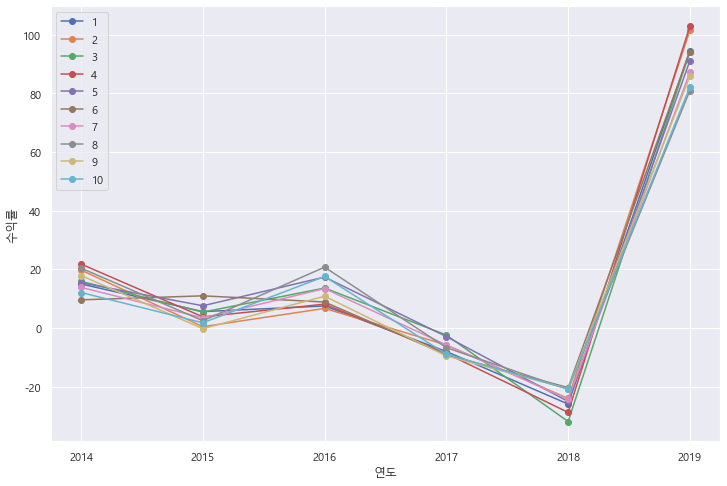

In [12]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [13]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,14.74,41.68,-25.98,-4.67,6.50,13.08,94.54
2,6.0,16.37,44.09,-24.08,-4.29,3.52,16.44,101.40
3,6.0,15.76,42.11,-31.94,-0.50,9.47,15.29,94.15
4,6.0,16.48,45.63,-28.82,-5.61,5.92,18.32,102.86
5,6.0,17.20,39.37,-25.10,-0.35,11.45,16.83,91.06
6,6.0,15.66,40.48,-20.37,-4.68,9.18,10.58,94.21
7,6.0,14.59,38.27,-24.36,-3.52,8.40,13.70,87.12
8,6.0,16.11,35.56,-20.95,-4.46,11.40,20.61,80.90
9,6.0,13.97,37.82,-20.74,-7.25,5.25,16.06,85.82


#### 매출액 증가율

In [14]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['매출액_상태'] == "흑자지속"),
                    ['매출액증가율', '수익률']]
    group_list = pd.qcut(temp['매출액증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

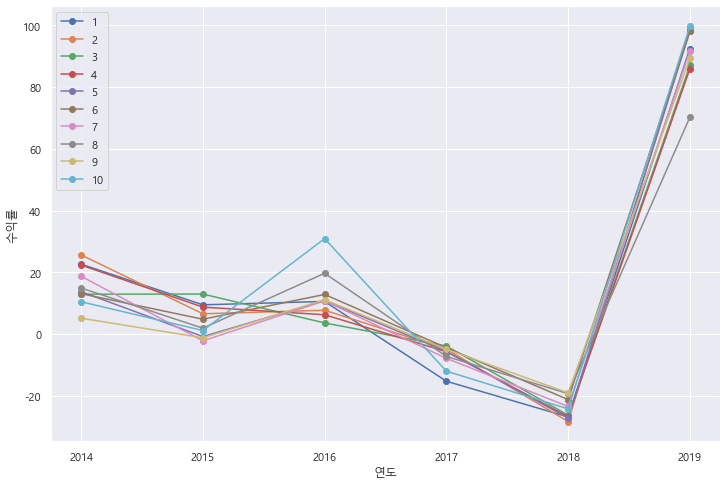

In [15]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [16]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,15.53,41.86,-26.78,-9.04,10.06,19.65,92.42
2,6.0,17.63,43.57,-28.27,-1.96,7.18,21.18,98.85
3,6.0,14.42,38.39,-26.21,-1.95,8.30,12.98,86.99
4,6.0,15.17,38.37,-26.68,-2.68,7.53,18.98,85.90
5,6.0,14.86,43.28,-27.16,-4.36,5.04,13.03,98.06
6,6.0,17.23,41.62,-21.16,-2.06,8.86,13.05,98.05
7,6.0,14.65,40.49,-23.38,-6.39,4.33,16.76,91.68
8,6.0,13.40,31.28,-19.26,-4.89,8.45,18.53,70.23
9,6.0,13.45,38.57,-18.97,-3.95,2.00,9.67,89.37


#### 영업이익 증가율

In [17]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['영업이익_상태'] == "흑자지속"),
                    ['영업이익증가율', '수익률']]
    group_list = pd.qcut(temp['영업이익증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

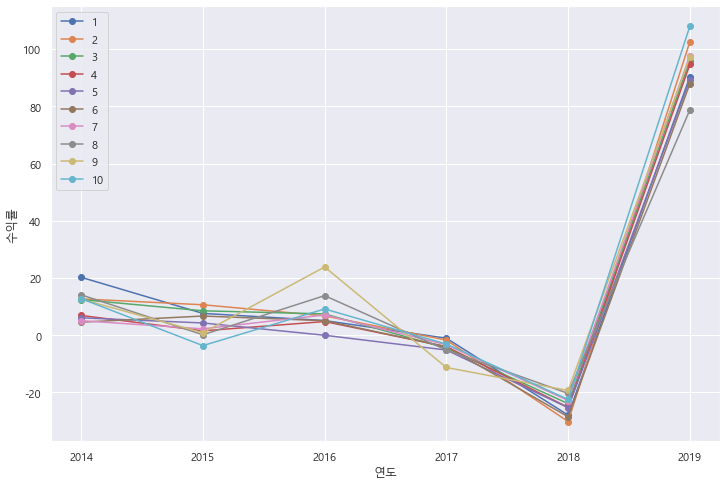

In [18]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [19]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,15.72,39.86,-27.91,0.50,6.38,17.09,90.28
2,6.0,16.81,44.86,-30.16,0.42,8.70,12.19,102.58
3,6.0,16.00,41.36,-23.91,-1.52,7.99,11.47,95.99
4,6.0,13.11,41.58,-25.20,-2.60,3.16,6.38,94.62
5,6.0,11.52,39.74,-25.32,-3.89,2.14,5.64,89.26
6,6.0,11.96,39.48,-28.51,-1.88,4.82,6.30,87.92
7,6.0,14.33,42.26,-22.82,-1.93,3.66,6.59,97.72
8,6.0,13.56,34.44,-20.33,-3.85,7.00,14.05,78.75
9,6.0,17.33,42.14,-19.31,-8.24,6.74,21.05,97.23


#### 당기순이익 증가율

In [20]:
result = []
for year in range(2014, 2020):
    temp = data.loc[(data['연도'] == year) & (data['당기순이익_상태'] == "흑자지속"),
                    ['당기순이익증가율', '수익률']]
    group_list = pd.qcut(temp['당기순이익증가율'], 10, labels = range(1, 11)).astype(int)
    for group in range(1, 11):
        ror_list = temp.loc[group_list == group, '수익률']
        inve_per_stock = 10**8 / len(ror_list)
        profit = (inve_per_stock * ror_list / 100).sum()
        profit_ratio = profit / 10 ** 8 * 100
        result.append([year, group, profit_ratio])
result = pd.DataFrame(result, columns = ["연도", "그룹", "수익률"]) 

Text(0.5, 0, '연도')

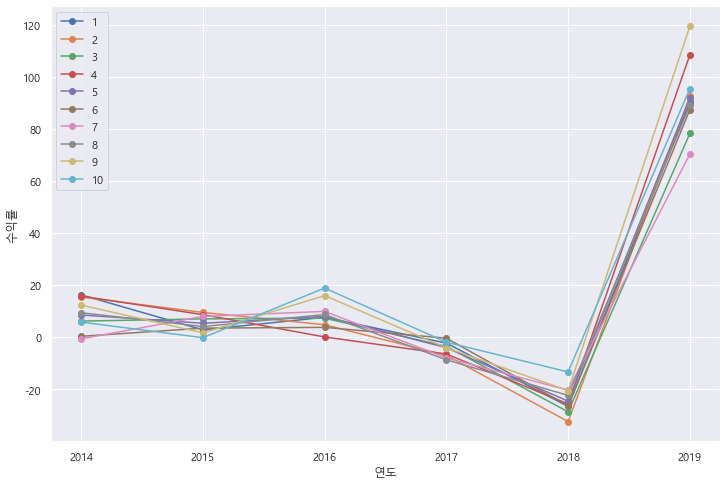

In [21]:
plt.figure(figsize = (12, 8))
for group in range(1, 11):
    graph_data = result.loc[(result['그룹'] == group), '수익률'].values    
    plt.plot(graph_data, marker = "o", label = group)
plt.xticks(range(6), range(2014, 2020))
plt.legend()
plt.ylabel("수익률")
plt.xlabel("연도")

In [22]:
display(result.groupby('그룹')['수익률'].describe().round(2))

,count,mean,std,min,25%,50%,75%,max
그룹,,,,,,,,
1,6.0,14.69,39.77,-26.60,-1.01,5.22,14.10,90.34
2,6.0,13.80,42.10,-32.39,-4.05,7.14,13.94,92.51
3,6.0,11.09,35.66,-28.66,-1.11,6.60,7.24,78.25
4,6.0,16.81,47.09,-25.64,-4.83,4.38,14.01,108.44
5,6.0,14.18,40.03,-24.58,-1.69,6.67,8.40,91.83
6,6.0,11.37,38.93,-26.33,-0.22,1.90,3.70,87.37
7,6.0,9.87,31.61,-20.34,-6.14,3.65,9.43,70.30
8,6.0,13.36,39.02,-22.36,-5.50,6.40,9.22,89.03
9,6.0,20.80,50.04,-20.52,-2.66,7.00,15.07,119.44
